CAL
Check for droughts within spei<=-1
From  2013-03-01T00:00:00.000000000  until  2015-12-01 00:00:00 . Duration is  34  months.
From  2020-05-01T00:00:00.000000000  until  2022-12-01 00:00:00 . Duration is  32  months.
WEU
Check for droughts within spei<=-1
From  1959-06-01T00:00:00.000000000  until  1960-08-01 00:00:00 . Duration is  15  months.
From  1976-04-01T00:00:00.000000000  until  1977-03-01 00:00:00 . Duration is  12  months.
From  2003-08-01T00:00:00.000000000  until  2004-07-01 00:00:00 . Duration is  12  months.
From  2018-09-01T00:00:00.000000000  until  2019-09-01 00:00:00 . Duration is  13  months.
BRA
Check for droughts within spei<=-1
From  1978-08-01T00:00:00.000000000  until  1980-03-01 00:00:00 . Duration is  20  months.
From  1981-05-01T00:00:00.000000000  until  1982-09-01 00:00:00 . Duration is  17  months.
From  2005-09-01T00:00:00.000000000  until  2007-07-01 00:00:00 . Duration is  23  months.
From  2013-07-01T00:00:00.000000000  until  2014-07-01 00:00:00 

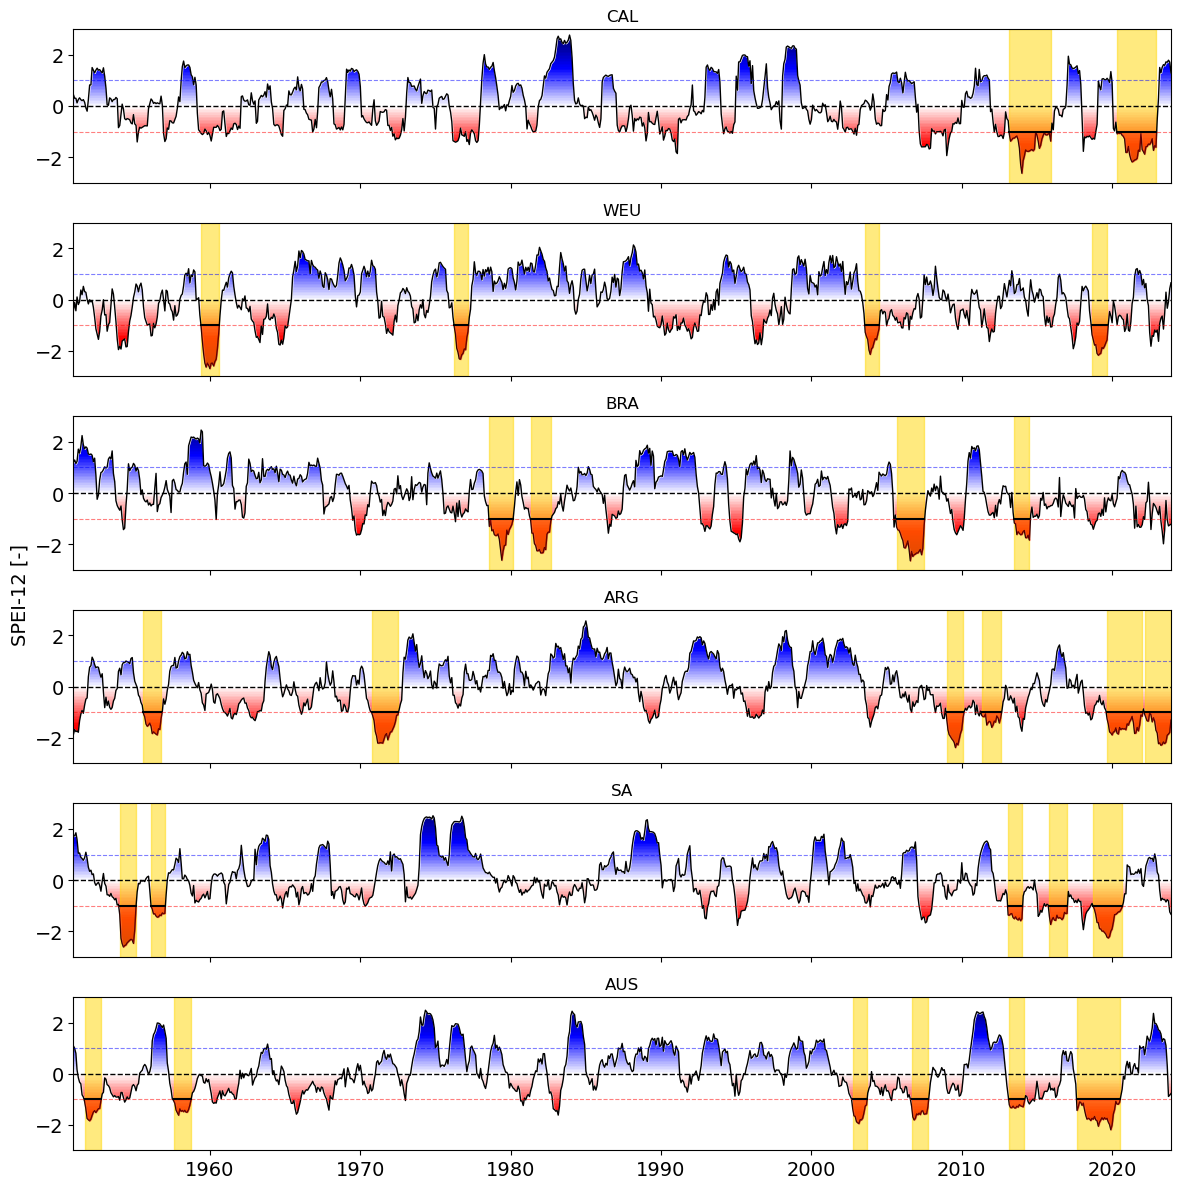

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 24 13:15:32 2023

@author: 6196306

"""
#Import packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import spei as si  # si for standardized index
import pandas as pd

#Make one functions file. 
# import sys
# sys.path.append("/home/6196306/Data/Python_scripts/")
# from functions import MYD

def MYD(spei, region_name):
    """
    Function to calculate the start, end and length of multi-year droughts. 
    Input: timeseries of SPEI, and a string with the region name. 
    Output: start_date, end_date, length
    """
    print(region_name)
    i=0
    start_date = []
    end_date = []
    length = []
    print("Check for droughts within spei<=-1")
    for t in spei.time:
      if spei.sel(time=t).mean()<=-1:
        i=i+1
        if i==1:
            start_drought = t.values
            start = t
        elif t==spei.time[-1] and i>=12:
            start_date.append(start)
            end_date.append(t)
            length.append(i)
            print("From ", start_drought, " until ", t.values, ". Duration is ", i, " months.")
      else:
        if i>=12:
            start_date.append(start)
            end = t.values-pd.DateOffset(months=1)
            end_date.append(spei.time.sel(time=end))
            length.append(i)
            #end_date.append(t)
            print("From ", start_drought, " until ", end, ". Duration is ", i, " months.")
        i=0
        continue
    return start_date, end_date, length

# Load in data
SPEI_ind = xr.open_dataset("/scratch/ruiij001/Data/SPEI/0_5_degrees_apr_2024/SPEI12_monthly_1950_2023_0_5_degree_IND.nc").__xarray_dataarray_variable__
SPEI_cal = xr.open_dataset("/scratch/ruiij001/Data/SPEI/0_5_degrees_apr_2024/SPEI12_monthly_1950_2023_0_5_degree_CAL.nc").__xarray_dataarray_variable__
SPEI_aus = xr.open_dataset("/scratch/ruiij001/Data/SPEI/0_5_degrees_apr_2024/SPEI12_monthly_1950_2023_0_5_degree_AUS.nc").__xarray_dataarray_variable__
SPEI_weu = xr.open_dataset("/scratch/ruiij001/Data/SPEI/0_5_degrees_apr_2024/SPEI12_monthly_1950_2023_0_5_degree_WEU.nc").__xarray_dataarray_variable__
SPEI_sa = xr.open_dataset("/scratch/ruiij001/Data/SPEI/0_5_degrees_apr_2024/SPEI12_monthly_1950_2023_0_5_degree_SA.nc").__xarray_dataarray_variable__
SPEI_arg = xr.open_dataset("/scratch/ruiij001/Data/SPEI/0_5_degrees_apr_2024/SPEI12_monthly_1950_2023_0_5_degree_ARG.nc").__xarray_dataarray_variable__
SPEI_BRAH = xr.open_dataset("/scratch/ruiij001/Data/SPEI/0_5_degrees_apr_2024/SPEI12_monthly_1950_2023_0_5_degree_BAH.nc").__xarray_dataarray_variable__
SPEI_IND_mean = xr.open_dataset("/scratch/ruiij001/Data/SPEI/0_5_degrees_apr_2024/SPEI12_monthly_1950_2023_0_5_degree_IND_ens_mean.nc").__xarray_dataarray_variable__

#Caluclate MYDs
SPEI = [SPEI_cal, SPEI_weu, SPEI_BRAH, SPEI_arg, SPEI_sa, SPEI_aus]
region = ["CAL", "WEU", "BRA", "ARG" , "SA", "AUS"]
MYDs = [MYD(SPEI_cal, "CAL"), MYD(SPEI_weu, "WEU"), MYD(SPEI_BRAH, "BRA"), MYD(SPEI_arg, "ARG"), MYD(SPEI_sa, "SA"), MYD(SPEI_aus, "AUS")]

#%% Plot SPEI-12
fig, axes = plt.subplots(6,1, sharex=True, figsize=(12,12), tight_layout=True)
for i, ax in enumerate(axes):
    spei_pd = SPEI[i].to_pandas()
    si.plot.si(spei_pd[11:], ax=ax)
    ax.axhline(y=-1, color="red", linestyle="dashed", linewidth=0.8, alpha=0.5)
    ax.axhline(y=1, color="blue", linestyle="dashed", linewidth=0.8, alpha=0.5)
    start_date = MYDs[i][0]
    end_date = MYDs[i][1]
    for start, end in zip(start_date, end_date):
        spei_subset = SPEI[i].sel(time=slice(start, end))
        if (spei_subset <= -1).any():
            ax.fill_between(spei_subset.time, spei_subset, y2=-1, color='red', alpha=0.3, zorder=2)
            ax.plot(spei_subset.time, np.full(len(spei_subset.time), -1), color="black", zorder=3)
            ax.fill_between(spei_subset.time, y1=3, y2=-3, color="gold", alpha=0.5, zorder=1)
    ax.tick_params(labelsize=14)
    ax.set_title(str(region[i]))
fig.supylabel("SPEI-12 [-]", fontsize=14)
fig.savefig("/home/ruiij001/scripts/2024_07_23_github_scripts/Figures/SPEI-12_all_regions.jpg", dpi=1200)
fig.savefig("/home/ruiij001/scripts/2024_07_23_github_scripts/Figures/SPEI-12_all_regions.pdf")

# From 2000-2022

In [13]:
# Load in data
SPEI_ind = xr.open_dataset("/scratch/ruiij001/Data/SPEI/0_5_degrees_apr_2024/SPEI12_monthly_1950_2023_0_5_degree_IND.nc").__xarray_dataarray_variable__.sel(time = slice("2000","2022"))
SPEI_cal = xr.open_dataset("/scratch/ruiij001/Data/SPEI/0_5_degrees_apr_2024/SPEI12_monthly_1950_2023_0_5_degree_CAL.nc").__xarray_dataarray_variable__.sel(time = slice("2000","2022"))
SPEI_aus = xr.open_dataset("/scratch/ruiij001/Data/SPEI/0_5_degrees_apr_2024/SPEI12_monthly_1950_2023_0_5_degree_AUS.nc").__xarray_dataarray_variable__.sel(time = slice("2000","2022"))
SPEI_weu = xr.open_dataset("/scratch/ruiij001/Data/SPEI/0_5_degrees_apr_2024/SPEI12_monthly_1950_2023_0_5_degree_WEU.nc").__xarray_dataarray_variable__.sel(time = slice("2000","2022"))
SPEI_sa = xr.open_dataset("/scratch/ruiij001/Data/SPEI/0_5_degrees_apr_2024/SPEI12_monthly_1950_2023_0_5_degree_SA.nc").__xarray_dataarray_variable__.sel(time = slice("2000","2022"))
SPEI_arg = xr.open_dataset("/scratch/ruiij001/Data/SPEI/0_5_degrees_apr_2024/SPEI12_monthly_1950_2023_0_5_degree_ARG.nc").__xarray_dataarray_variable__.sel(time = slice("2000","2022"))
SPEI_BRAH = xr.open_dataset("/scratch/ruiij001/Data/SPEI/0_5_degrees_apr_2024/SPEI12_monthly_1950_2023_0_5_degree_BAH.nc").__xarray_dataarray_variable__.sel(time = slice("2000","2022"))
SPEI_IND_mean = xr.open_dataset("/scratch/ruiij001/Data/SPEI/0_5_degrees_apr_2024/SPEI12_monthly_1950_2023_0_5_degree_IND_ens_mean.nc").__xarray_dataarray_variable__.sel(time = slice("2000","2022"))

#Caluclate MYDs
SPEI = [SPEI_cal, SPEI_weu, SPEI_BRAH, SPEI_arg, SPEI_sa, SPEI_aus]
region = ["CAL", "WEU", "BRA", "ARG" , "SA", "AUS"]
MYDs = [MYD(SPEI_cal, "CAL"), MYD(SPEI_weu, "WEU"), MYD(SPEI_BRAH, "BRA"), MYD(SPEI_arg, "ARG"), MYD(SPEI_sa, "SA"), MYD(SPEI_aus, "AUS")]

CAL
Check for droughts within spei<=-1
From  2013-03-01T00:00:00.000000000  until  2015-12-01 00:00:00 . Duration is  34  months.
From  2020-05-01T00:00:00.000000000  until  2022-12-01T00:00:00.000000000 . Duration is  32  months.
WEU
Check for droughts within spei<=-1
From  2003-08-01T00:00:00.000000000  until  2004-07-01 00:00:00 . Duration is  12  months.
From  2018-09-01T00:00:00.000000000  until  2019-09-01 00:00:00 . Duration is  13  months.
BRA
Check for droughts within spei<=-1
From  2005-09-01T00:00:00.000000000  until  2007-07-01 00:00:00 . Duration is  23  months.
From  2013-07-01T00:00:00.000000000  until  2014-07-01 00:00:00 . Duration is  13  months.
ARG
Check for droughts within spei<=-1
From  2009-01-01T00:00:00.000000000  until  2010-02-01 00:00:00 . Duration is  14  months.
From  2011-05-01T00:00:00.000000000  until  2012-08-01 00:00:00 . Duration is  16  months.
From  2019-09-01T00:00:00.000000000  until  2022-01-01 00:00:00 . Duration is  29  months.
SA
Check for dr

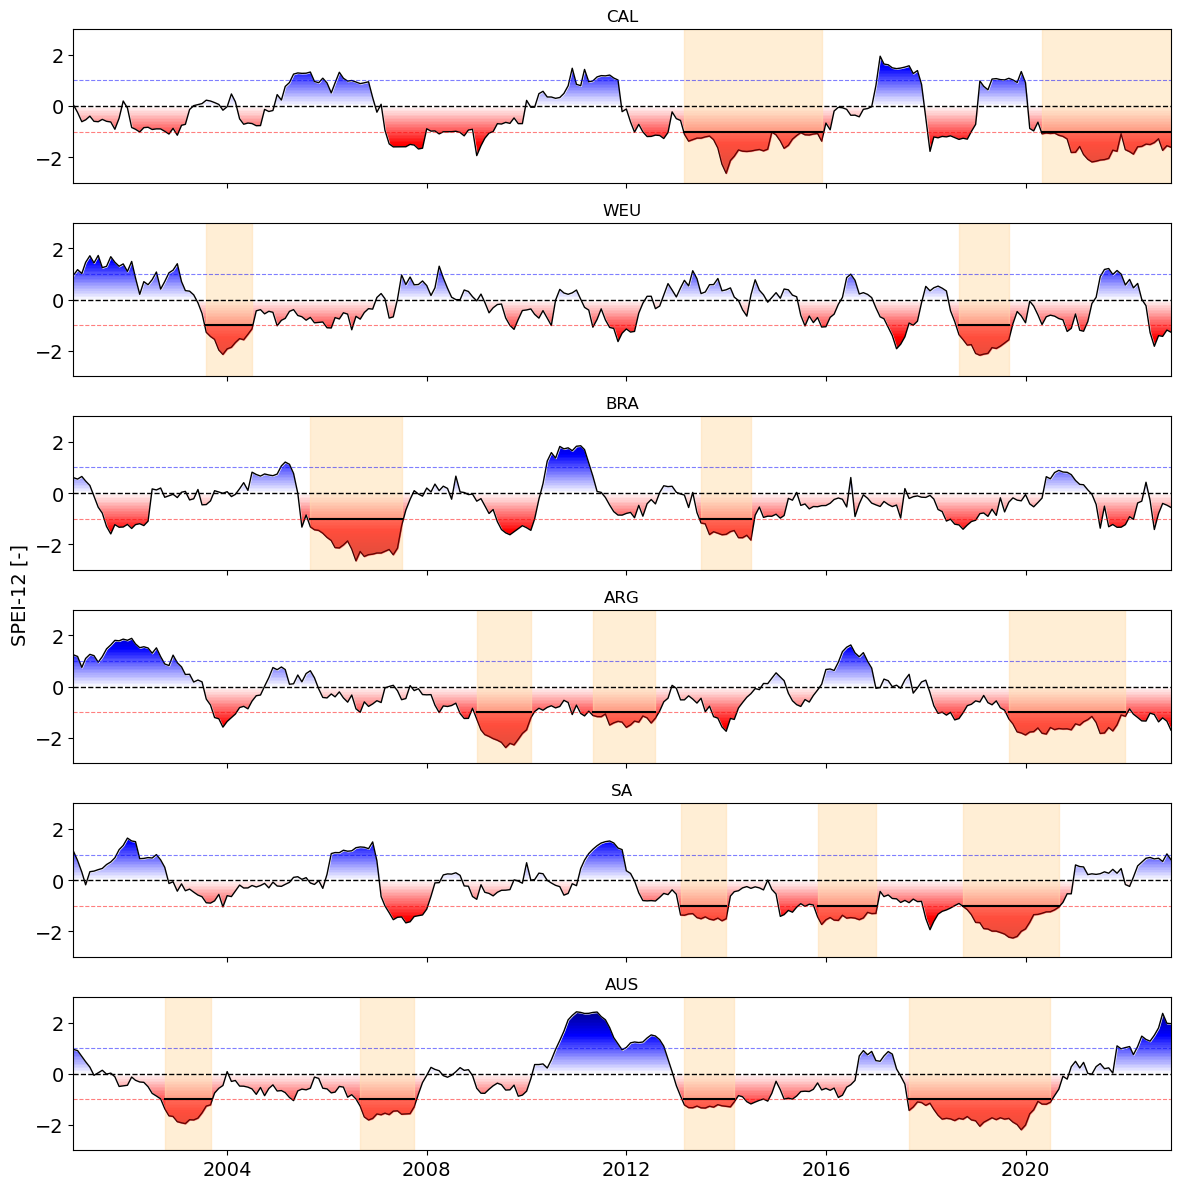

In [23]:
#%% Plot SPEI-12
fig, axes = plt.subplots(6,1, sharex=True, figsize=(12,12), tight_layout=True)
for i, ax in enumerate(axes):
    spei_pd = SPEI[i].to_pandas()
    si.plot.si(spei_pd[11:], ax=ax)
    ax.axhline(y=-1, color="red", linestyle="dashed", linewidth=0.8, alpha=0.5)
    ax.axhline(y=1, color="blue", linestyle="dashed", linewidth=0.8, alpha=0.5)
    start_date = MYDs[i][0]
    end_date = MYDs[i][1]
    for start, end in zip(start_date, end_date):
        spei_subset = SPEI[i].sel(time=slice(start, end))
        if (spei_subset <= -1).any():
            ax.fill_between(spei_subset.time, spei_subset, y2=-1, color='red', alpha=0.3, zorder=2)
            ax.plot(spei_subset.time, np.full(len(spei_subset.time), -1), color="black", zorder=3)
            ax.fill_between(spei_subset.time, y1=3, y2=-3, color="navajowhite", alpha=0.5, zorder=1)
    ax.tick_params(labelsize=14)
    ax.set_title(str(region[i]))
fig.supylabel("SPEI-12 [-]", fontsize=14)
fig.savefig("/home/ruiij001/scripts/2024_07_23_github_scripts/Figures/SPEI-12_all_regions_2000_2022v2.jpg", dpi=1200)
fig.savefig("/home/ruiij001/scripts/2024_07_23_github_scripts/Figures/SPEI-12_all_regions_2000_2022v2.pdf")

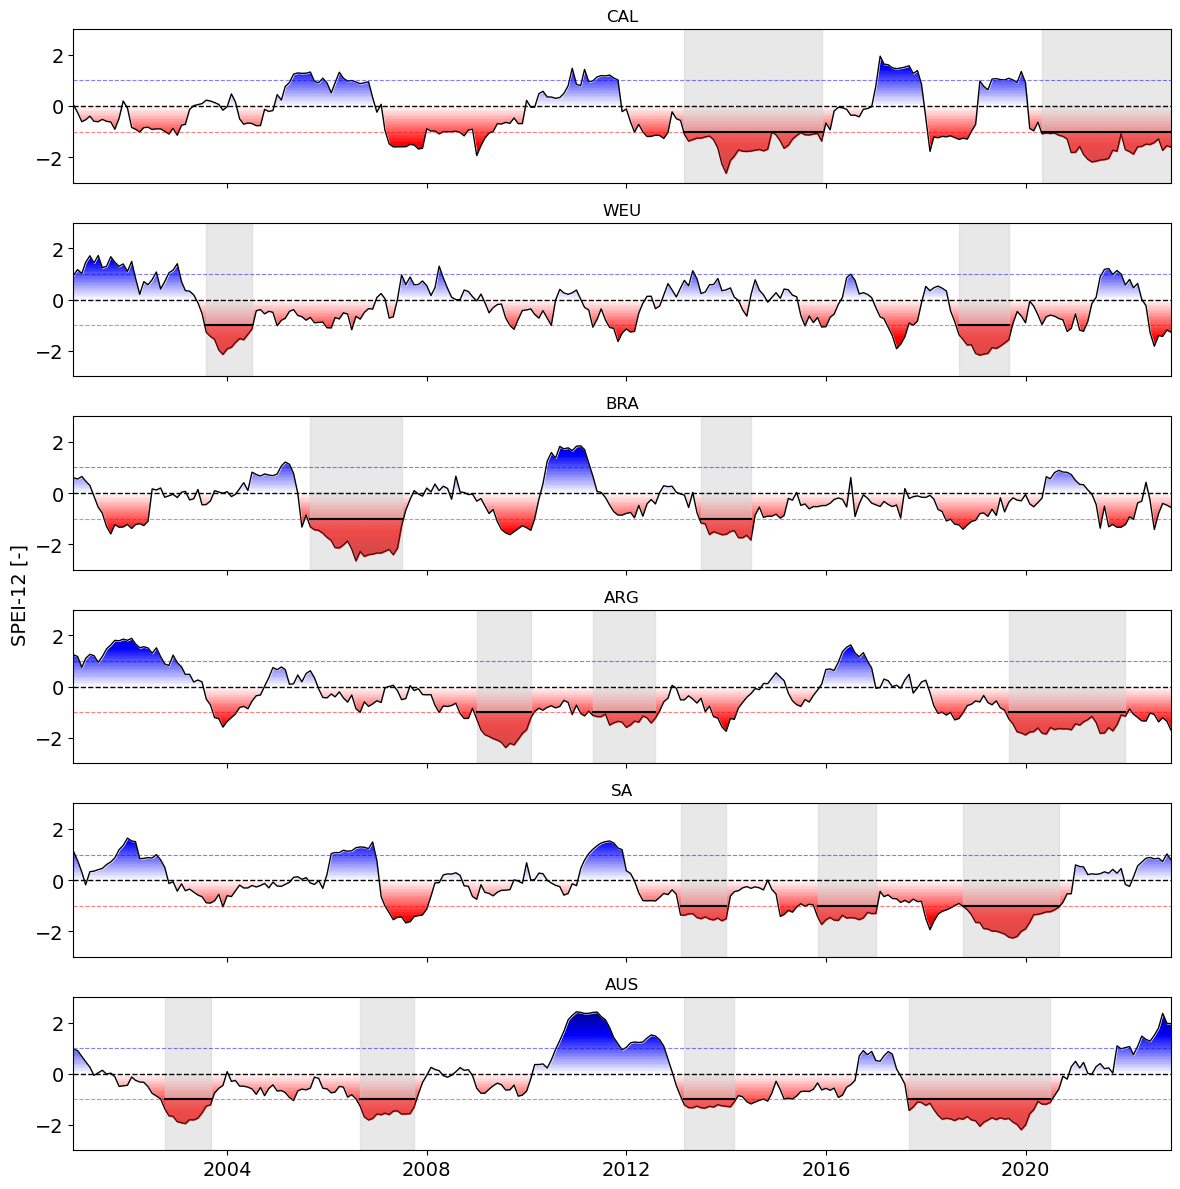

In [22]:
#%% Plot SPEI-12
fig, axes = plt.subplots(6,1, sharex=True, figsize=(12,12), tight_layout=True)
for i, ax in enumerate(axes):
    spei_pd = SPEI[i].to_pandas()
    si.plot.si(spei_pd[11:], ax=ax)
    ax.axhline(y=-1, color="red", linestyle="dashed", linewidth=0.8, alpha=0.5)
    ax.axhline(y=1, color="blue", linestyle="dashed", linewidth=0.8, alpha=0.5)
    start_date = MYDs[i][0]
    end_date = MYDs[i][1]
    for start, end in zip(start_date, end_date):
        spei_subset = SPEI[i].sel(time=slice(start, end))
        if (spei_subset <= -1).any():
            ax.fill_between(spei_subset.time, spei_subset, y2=-1, color='red', alpha=0.3, zorder=2)
            ax.plot(spei_subset.time, np.full(len(spei_subset.time), -1), color="black", zorder=3)
            ax.fill_between(spei_subset.time, y1=3, y2=-3, color="lightgrey", alpha=0.5, zorder=1)
    ax.tick_params(labelsize=14)
    ax.set_title(str(region[i]))
fig.supylabel("SPEI-12 [-]", fontsize=14)
fig.savefig("/home/ruiij001/scripts/2024_07_23_github_scripts/Figures/SPEI-12_all_regions_2000_2022.jpg", dpi=1200)
fig.savefig("/home/ruiij001/scripts/2024_07_23_github_scripts/Figures/SPEI-12_all_regions_2000_2022.pdf")